<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Vannskade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vise vannskadedata fra Innsikt for ulike skadeårsaker 

## Importere nødvendige biblioteker


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lese filer lagret lokalt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving naturskade_ikke_pool.xlsx to naturskade_ikke_pool.xlsx
Saving vannskade_frost.xlsx to vannskade_frost.xlsx
Saving vannskade_tilstopping.xlsx to vannskade_tilstopping.xlsx
Saving vannskade_vanninntregning.xlsx to vannskade_vanninntregning.xlsx


## Enkel lineær regresjon

In [3]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det



## Hente data fra importerte filer

In [4]:
navn = ['år','mnd','skade']
år = np.arange(2000,2030,1)

frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=navn)
tilstopp = pd.read_excel('vannskade_tilstopping.xlsx',header=None,skiprows=3,names=navn)
intre = pd.read_excel('vannskade_vanninntregning.xlsx',header=None,skiprows=3,names=navn)
nat = pd.read_excel('naturskade_ikke_pool.xlsx',header=None,skiprows=3,names=navn)

data_frost = []
data_til = []
data_inn = []
data_nat = []
for i in år[:-9]:
  frost1 = frost.loc[frost['år']==i,'skade'].sum()
  tilstopp1 = tilstopp.loc[tilstopp['år']==i,'skade'].sum()
  intre1 = intre.loc[intre['år']==i,'skade'].sum()
  nat1 = nat.loc[nat['år']==i,'skade'].sum()
  data_frost.append(frost1)
  data_til.append(tilstopp1)
  data_inn.append(intre1)
  data_nat.append(nat1)

## Plotte data

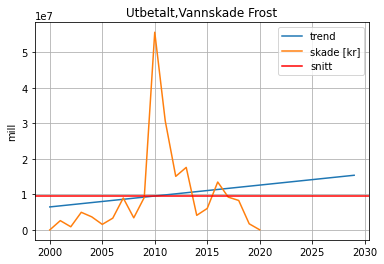

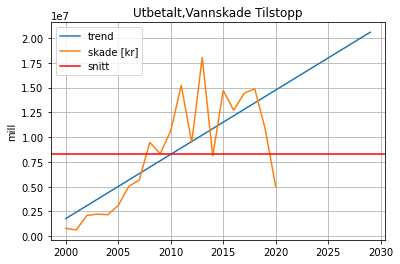

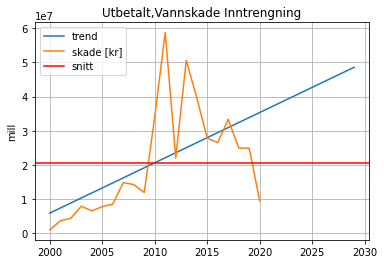

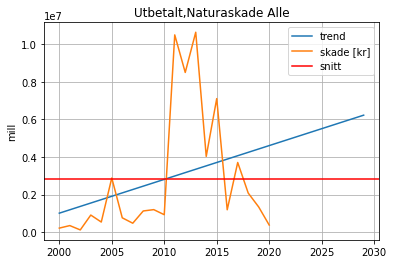

In [49]:
data_alle = np.array([data_frost,data_til,data_inn,data_nat])#.astype(np.float)
tit = np.array(['Vannskade Frost','Vannskade Tilstopp','Vannskade Inntrengning',
                'Naturaskade Alle'])
from matplotlib.ticker import ScalarFormatter
grid = np.array([0,1,2,3])
fig, ax = plt.subplots()#, figsize=(10,10))
bins = np.linspace(0,50,10)
for i,j in zip(data_alle,tit):

  snitt = np.mean(i)
  a,b = linreg(range(len(i)),i)  #//x=skade
  extrapolatedtrendline=[a*index + b for index in range(len(år))]
  plt.plot(år,extrapolatedtrendline,label="trend")
  plt.plot(år[:-9],i,label="skade [kr]")
  plt.axhline(y=snitt,color='r',label='snitt')
  plt.title("Utbetalt,"+str(j))#str(i))
  plt.ylabel("mill")
  #ax.ticklabel_format(useOffset=False)
  #plt.axis([2000,2030,0,50])
  #plt.set_major_formatter(ScalarFormatter())
  plt.grid(),plt.legend()
  
  plt.show()


In [45]:
import numpy as np
bin = np.linspace(0,50,10)
bin

array([ 0.        ,  5.55555556, 11.11111111, 16.66666667, 22.22222222,
       27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.        ])

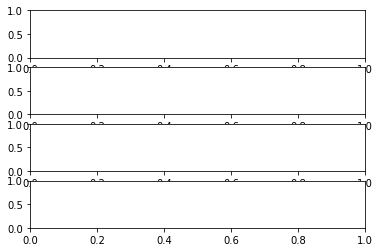

In [57]:
data_alle = np.array([data_frost,data_til,data_inn,data_nat])#.astype(np.float)
tit = np.array(['Vannskade Frost','Vannskade Tilstopp','Vannskade Inntrengning',
                'Naturaskade Alle'])
from matplotlib.ticker import ScalarFormatter
grid = np.array([0,1,2,3])
fig, axes = plt.subplots(4)#,sharex=True)#, figsize=(10,10))
bins = np.linspace(0,50,10)
#for i,j in zip(data_alle,tit):

#nitt = np.mean(i)
a,b = linreg(range(len(data_frost)),data_frost)  #//x=skade
extrapolatedtrendline=[a*index + b for index in range(len(år))]
ax.plot(år,extrapolatedtrendline,label="trend")
ax.plot(år[:-9],data_alle[0],label="skade [kr]")
  #plt.axhline(y=snitt,color='r',label='snitt')
  #plt.title("Utbetalt,"+str(j))#str(i))
  #plt.ylabel("mill")
  #ax.ticklabel_format(useOffset=False)
  #plt.axis([2000,2030,0,50])
  #plt.set_major_formatter(ScalarFormatter())
  #plt.grid(),plt.legend(), 
plt.show()


In [53]:
data_alle[0]


array([1.70000000e+03, 2.61163800e+06, 8.88364000e+05, 4.95577160e+06,
       3.67214500e+06, 1.55652700e+06, 3.30681500e+06, 8.97388600e+06,
       3.40666600e+06, 9.12850200e+06, 5.55944119e+07, 3.06599080e+07,
       1.50644699e+07, 1.75880670e+07, 4.10330600e+06, 6.03546300e+06,
       1.34741880e+07, 9.22883950e+06, 8.28534463e+06, 1.71991000e+06,
       3.37340000e+04])